# Music Recommendation System
### Data Science Intern
### LGMVIP - August 2022
### Task - 4 (Beginner Level)

#### Dataset link : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data 

### Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Importing datasets

In [3]:
#Load Datasets
df = pd.read_csv('kkbox/train.csv')
songs = pd.read_csv('kkbox/songs.csv')
members = pd.read_csv('kkbox/members.csv')
song_extra_info= pd.read_csv('kkbox/song_extra_info.csv')

In [4]:
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [4]:
df1= pd.merge(df, songs, on="song_id", how="left")
df2= pd.merge(df1, song_extra_info, on="song_id", how="left")
df= pd.merge(df2, members, on="msno", how="left")

In [5]:
df.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,247803.0,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,Panda,USUM71601094,1,0,NaN,7,20120102,20171005
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,female,9,20110525,20170911
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,181115.0,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,NaN,52.0,Star Of The Show,USLXJ1607334,1,0,NaN,7,20120102,20171005
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,Ryan Tedder,NaN,52.0,Dreaming Out Loud,USUM70759544,15,26,male,9,20111107,20180304
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1,257369.0,465,OneRepublic,Ryan Tedder,NaN,52.0,Counting Stars,USUM71301306,15,26,male,9,20111107,20180304


In [6]:
df.shape

(7377418, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  name                    object 
 13  isrc                    object 
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


In [8]:
#the memory usage here is 1.2+ GB which is a lot and beyond the scope of personal computer
#so we'll be taking a fraction of it to train our models
df = df.sample(frac=0.01)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 7266653 to 549636
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73547 non-null  object 
 3   source_screen_name      69590 non-null  object 
 4   source_type             73569 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72595 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                57084 non-null  object 
 10  lyricist                42055 non-null  object 
 11  language                73773 non-null  float64
 12  name                    73758 non-null  object 
 13  isrc                    68005 non-null  object 
 14  city                    73774 n

In [10]:
df.isnull().sum()

msno                          0
song_id                       0
source_system_tab           227
source_screen_name         4184
source_type                 205
target                        0
song_length                   1
genre_ids                  1179
artist_name                   1
composer                  16690
lyricist                  31719
language                      1
name                         16
isrc                       5769
city                          0
bd                            0
gender                    29598
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### Missing values

<AxesSubplot:>

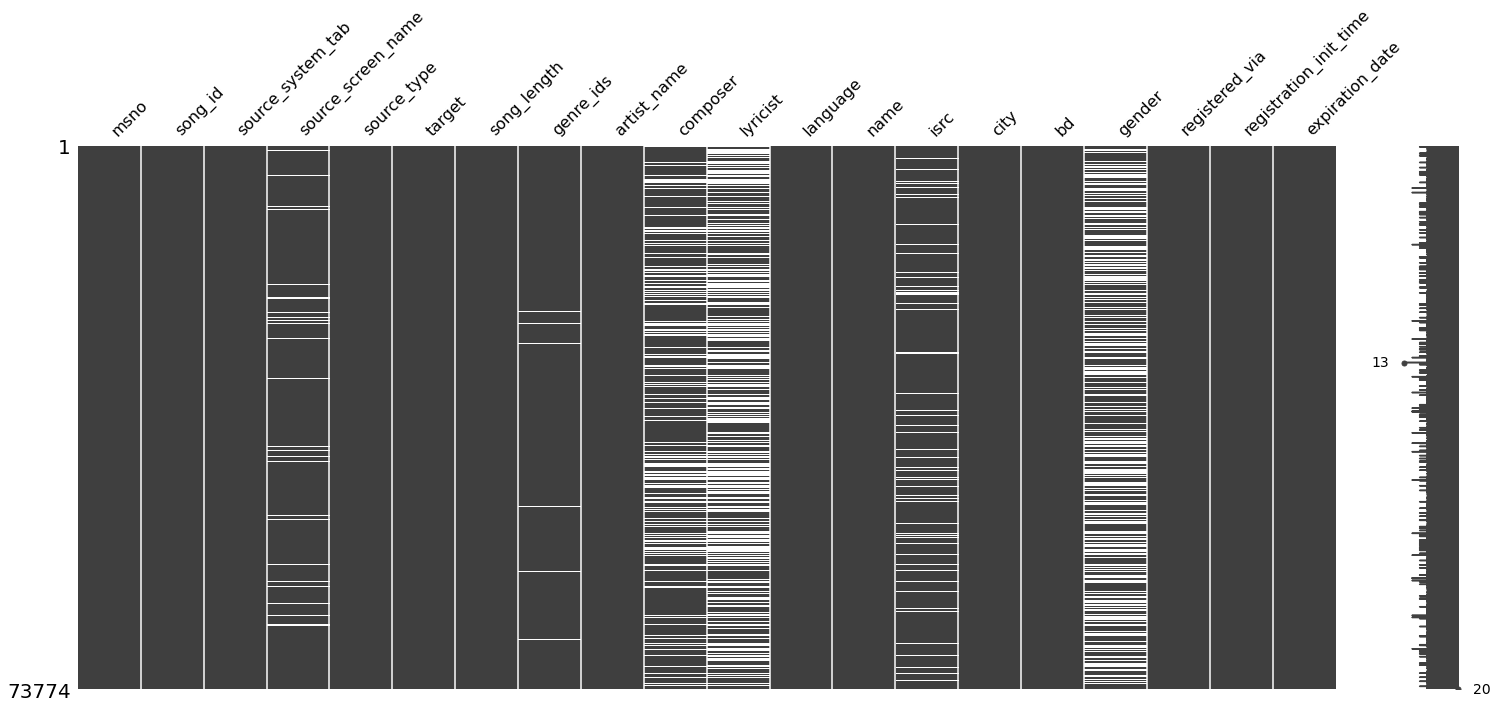

In [11]:
#There are a lot of missing values we need to deal with them before moving forward to get a better accuracy score
msno.matrix(df)

In [ ]:
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [19]:
#Extracting dates
# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [20]:
df.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
7266653,V5lwwG0HGvdDTVu+PRI3BDr3M7WReG4V5fJV/lYxWnw=,jlTtGWoZ394ulAhknVj/usDmdyWL706TVysUywGB8n4=,my library,Search,song,1,207307.0,465,鄧麗君 (Teresa Teng),Tony Tang,...,female,9,2006-07-28,2017-11-15,2006,7,28,2017,11,15
439774,0DvZGJrDHDT8zJ9rh/Y5O3EaRnoMeLjffouDwBpPgik=,3MkaOgdxd4cuJmC1WHXb9q+dDrwenRvp2upvtEBJtcU=,my library,Local playlist more,local-library,1,321600.0,458,滅火器 (Fire EX.),楊大正(Sam Yang),...,male,3,2013-11-10,2017-09-30,2013,11,10,2017,9,30
4202111,NapSQ9C9tjbMFO34ODka2ws688+wFrxwXpyeCr83u5Q=,rdNg0FiLBStCei8h1/h2kwv8IS97ZgONQkb/kXGAvqM=,discover,Discover Chart,online-playlist,0,236329.0,1011,Brett Eldredge,unknown,...,male,3,2013-09-07,2017-09-27,2013,9,7,2017,9,27
6157014,DRzHcq/z3LayO1vZix6l/yEMrsMHf3xjCp5IUWv1uYg=,U9usmN5XebhcISoVLiE7N9w/1wOJTMh3K4BDmP8DDgA=,discover,Online playlist more,online-playlist,1,217152.0,465,賴慈泓,賴慈泓,...,male,7,2017-01-17,2017-09-17,2017,1,17,2017,9,17
4319033,2TDyb2044i0z+NVnNQAp2S88Imy3jFN6QwpygJX+qFU=,rp3R37Y/XS8Euz9gngD9j4trv275XElwyWjgvK1bMMk=,search,Album more,album,1,236773.0,2022,謝和弦 (R-chord),謝和弦,...,unknown,7,2013-02-17,2017-10-07,2013,2,17,2017,10,7


In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()
for i in songs.columns :
    df[i] = label_encoder.fit_transform(df[i])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 7266653 to 549636
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   msno                          73774 non-null  object        
 1   song_id                       73774 non-null  int64         
 2   source_system_tab             73774 non-null  object        
 3   source_screen_name            73774 non-null  object        
 4   source_type                   73774 non-null  object        
 5   target                        73774 non-null  int64         
 6   song_length                   73774 non-null  int64         
 7   genre_ids                     73774 non-null  int64         
 8   artist_name                   73774 non-null  int64         
 9   composer                      73774 non-null  int64         
 10  lyricist                      73774 non-null  int64         
 11  language             

In [38]:
df['registration_init_time'] = df['registration_init_time'].astype('category')

# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 7266653 to 549636
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   msno                          73774 non-null  int16         
 1   song_id                       73774 non-null  int64         
 2   source_system_tab             73774 non-null  int8          
 3   source_screen_name            73774 non-null  int8          
 4   source_type                   73774 non-null  int8          
 5   target                        73774 non-null  int64         
 6   song_length                   73774 non-null  int64         
 7   genre_ids                     73774 non-null  int64         
 8   artist_name                   73774 non-null  int64         
 9   composer                      73774 non-null  int64         
 10  lyricist                      73774 non-null  int64         
 11  language             

In [40]:
df.drop('expiration_date', axis=1, inplace=True)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb


In [41]:
y = df.target
X = df.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# RandomForestClassifier
# Create model
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
# Predicting
val_pred = model.predict(X_val)

In [45]:
def model_with(model_name, X_train, X_test, y_train, y_test) :
    print("==================================================")
    print("Modeling with :", model_name)
    print()
        
    if model_name == "Random Forest Classifier" :
        model = RandomForestClassifier()
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier()         
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier()
    else :
        print("Model not found in function.")
        
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print()
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("ROC :", roc_auc_score(y_test, y_pred))
    
    print("##########################################################")
    print()
    print("\n")

In [46]:
models = ["Random Forest Classifier", "Extra Trees Classifier", "XGBoost Classifier"]
for i in models :
    model_with(i, X_train, X_test, y_train, y_test)

Modeling with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      9127
           1       0.63      0.65      0.64      9317

    accuracy                           0.63     18444
   macro avg       0.63      0.63      0.63     18444
weighted avg       0.63      0.63      0.63     18444


Accuracy : 0.6329971806549556
ROC : 0.6328180253084745
##########################################################



Modeling with : Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      9127
           1       0.64      0.65      0.64      9317

    accuracy                           0.64     18444
   macro avg       0.64      0.63      0.63     18444
weighted avg       0.64      0.64      0.63     18444


Accuracy : 0.6351116894382998
ROC : 0.634932199921918
##########################################################



Modeling with : XGBoost Class

#### The best performing model is Extra Trees Classifier.
Future Work: To boost the ROC score by doing more hyperparameter tuning and building more models.